# Code to plot the cosine similarity between topic vectors 
* for each partition it plots a heatmap of the cosine similarity between topic vectors computed in each window

In [1]:
import os
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from gensim import corpora, models, similarities

## INPUT PARAMETERS

In [3]:
# parameters to select the topic2vec model to load
n_docs = 11314
n_window_t2v = 2
random_seed_partition = 54
n_topics_LDA = 8

In [4]:
cwd =  os.getcwd() # Prints the working directory
results_dir_path = cwd + '/results/20NG_lemmatiz_DBOW_win5_n_topics' + str (n_topics_LDA) +'_n_doc' + str(n_docs) + '_n_win' + str(n_window_t2v)


In [5]:
topic_list = []
for i in xrange(n_topics_LDA):
    topic_list.append('topic_' + str(i))

Bbox('array([[ 0.125     ,  0.125     ],\n       [ 0.47727273,  0.9       ]])')
Bbox('array([[ 0.54772727,  0.125     ],\n       [ 0.9       ,  0.9       ]])')


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


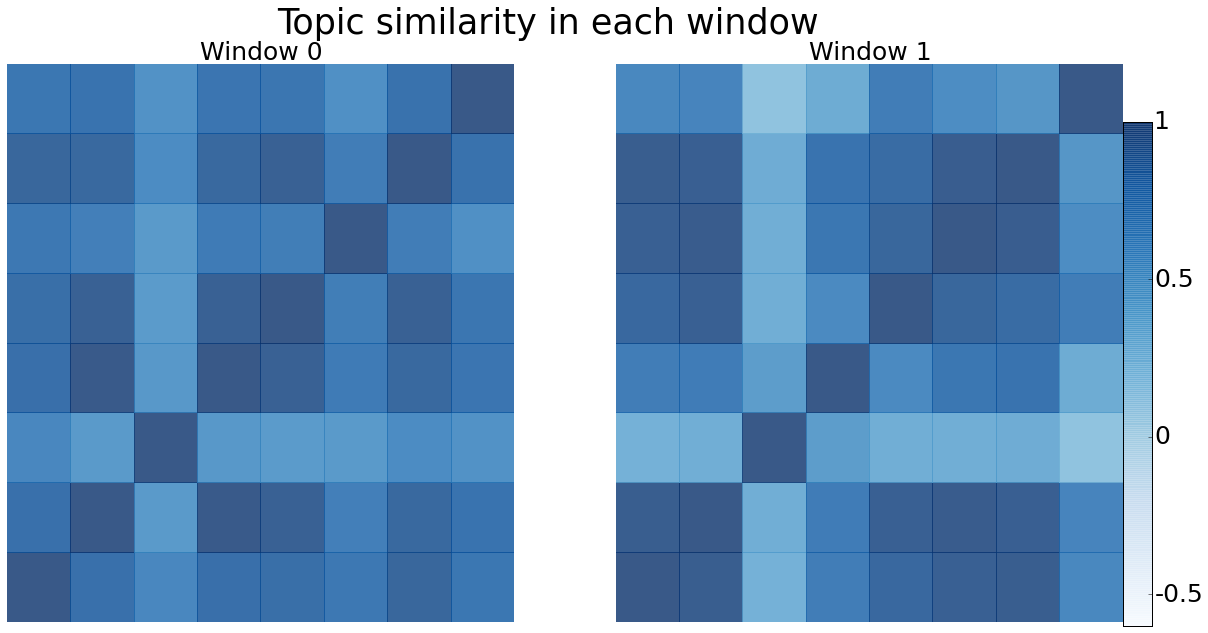

In [6]:
#%matplotlib qt
topic_to_topic = np.zeros((n_topics_LDA,n_topics_LDA))

fig, axes = plt.subplots(nrows=1, ncols=n_window_t2v)

fig.set_size_inches(20, 10)
 
fig.suptitle('Topic similarity in each window', size = 35)

for i_window in xrange(n_window_t2v):

    fname = results_dir_path + '/t2v_20NG_partSEED' + str(random_seed_partition) + '_win' + str(i_window) + '.model'
    model = models.Doc2Vec.load(fname)

    for idx,i_topic in enumerate(topic_list):
        for jdx,j_topic in enumerate(topic_list):
            topic_to_topic[idx,jdx] = model.docvecs.similarity(i_topic, j_topic)
            
    # Plot it out
    ax = axes[i_window]
    heatmap = ax.pcolor(topic_to_topic, cmap=plt.cm.Blues, alpha=0.8, vmin=-0.6, vmax=1)
    ax.set_title('Window '+str(i_window), size = 25)
    print(ax.get_position()) 
    
    # turn off the frame
    ax.set_frame_on(False)

    # note I could have used nba_sort.columns but made "labels" instead
    ax.set_xticklabels([], minor=False, rotation='vertical')
    ax.set_yticklabels([], minor=False)

    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    

# Add colorbar, make sure to specify tick locations to match desired ticklabels
# Make an axis for the colorbar on the right side
cax = fig.add_axes([0.9, 0.12, 0.02, 0.7])
cbar = fig.colorbar(heatmap, cax=cax, ticks=[-0.5, 0, 0.5, 1])
cbar.ax.set_yticklabels(['-0.5', '0', '0.5', '1'], size = 25)  # vertically oriented colorbar
     
        
fig.savefig(results_dir_path +'/topic_similarity_intrawindow_partSEED' + str(random_seed_partition) + '.png', bbox = 'True')